In [1]:
!pip install twikit datetime twitter-api-client -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.4/110.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00


In [ ]:
from twikit import Client

USERNAME = 'MisterMohammed0'
EMAIL = 'mohammedfoud30@gmail.com'
PASSWORD = '009988Ppooii@@'

# Initialize client
client = Client('en-US')

client.login(
    auth_info_1=USERNAME ,
    auth_info_2=EMAIL,
    password=PASSWORD
)

In order to protect your account from suspicious activity, we've sent a confirmation code to mo************@g****.***. Enter it below to sign in.	
>>> kstr5cxe


{'flow_token': 'g;171857034105641827:-1718570341102:LbYzvKhEhJLuStEtwE4reOpJ:14',
 'status': 'success',
 'subtasks': [{'subtask_id': 'LoginSuccessSubtask',
   'open_account': {'user': {'id': 1457334683923058693,
     'id_str': '1457334683923058693',
     'name': 'Mohammed Foud',
     'screen_name': 'MisterMohammed0'},
    'next_link': {'link_type': 'subtask',
     'link_id': 'next_link',
     'subtask_id': 'SuccessExit'},
    'attribution_event': 'login'}},
  {'subtask_id': 'SuccessExit',
   'open_link': {'link': {'link_type': 'subtask',
     'link_id': 'next_link',
     'subtask_id': 'LoginOpenHomeTimeline'}}},
  {'subtask_id': 'LoginOpenHomeTimeline',
   'open_home_timeline': {'next_link': {'link_type': 'abort',
     'link_id': 'next_link'}}}]}

In [ ]:
from datetime import datetime

def is_between_dates(check_date_str):
    # Define the date format
    date_format = '%a %b %d %H:%M:%S %z %Y'
    start_date_str = 'Tue Feb 20 00:00:00 +0000 2024'
    end_date_str = 'Tue Mar 05 00:00:00 +0000 2024'

    # Convert the date strings to datetime objects
    start_date = datetime.strptime(start_date_str, date_format)
    end_date = datetime.strptime(end_date_str, date_format)
    check_date = datetime.strptime(check_date_str, date_format)

    # Check if check_date is between start_date and end_date
    return start_date <= check_date <= end_date



In [ ]:
import csv
import os
from datetime import datetime, timezone
import time
from twikit import Client, TooManyRequests

# Define date range
# start_date = datetime.strptime('2024-02-20', '%Y-%m-%d').replace(tzinfo=timezone.utc)
# end_date = datetime.strptime('2024-03-05', '%Y-%m-%d').replace(tzinfo=timezone.utc)

# Set the desired maximum number of tweets to retrieve
max_tweets = 5000

# Define CSV file path
csv_file_path = 'tweets5000Latest.csv'

# Create CSV file and write header if it does not exist
if not os.path.isfile(csv_file_path):
    with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow([
              'id', 'created_at', 'created_at_datetime', 'text', 'lang',
    'in_reply_to', 'is_quote_status', 'quote', 'retweeted_tweet',
    'possibly_sensitive', 'possibly_sensitive_editable', 'quote_count',
    'media', 'reply_count', 'favorite_count', 'favorited', 'view_count',
    'retweet_count', 'editable_until_msecs', 'is_translatable',
    'is_edit_eligible', 'edits_remaining', 'state', 'replies',
    'reply_to', 'related_tweets', 'hashtags', 'poll', 'has_card',
    'thumbnail_title', 'thumbnail_url', 'urls', 'full_text',
    'user_id', 'user_created_at', 'user_name', 'user_screen_name',
    'user_profile_image_url', 'user_profile_banner_url', 'user_url',
    'user_location', 'user_description', 'user_description_urls',
    'user_urls', 'user_pinned_tweet_ids', 'user_blue_verified',
    'user_verified', 'user_possibly_sensitive', 'user_can_dm',
    'user_can_media_tag', 'user_want_retweets', 'user_default_profile',
    'user_default_profile_image', 'user_has_custom_timelines',
    'user_followers_count', 'user_fast_followers_count',
    'user_normal_followers_count', 'user_following_count',
    'user_favorites_count', 'user_listed_count', 'user_media_count',
    'user_statuses_count', 'user_is_translator', 'user_translator_type',
    'user_withheld_in_countries'
        ])

def write_tweet_to_csv(tweet, writer):
    user = tweet.user
    writer.writerow([
        tweet.id,
        tweet.created_at,
        tweet.created_at_datetime,
        tweet.text,
        tweet.lang,
        tweet.in_reply_to,
        tweet.is_quote_status,
        tweet.quote,
        tweet.retweeted_tweet,
        tweet.possibly_sensitive,
        tweet.possibly_sensitive_editable,
        tweet.quote_count,
        tweet.media,
        tweet.reply_count,
        tweet.favorite_count,
        tweet.favorited,
        tweet.view_count,
        tweet.retweet_count,
        tweet.editable_until_msecs,
        tweet.is_translatable,
        tweet.is_edit_eligible,
        tweet.edits_remaining,
        tweet.state,
        tweet.replies,
        tweet.reply_to,
        tweet.related_tweets,
        tweet.hashtags,
        tweet.poll,
        tweet.has_card,
        tweet.thumbnail_title,
        tweet.thumbnail_url,
        tweet.urls,
        tweet.full_text,
        user.id,
        user.created_at,
        user.name,
        user.screen_name,
        user.profile_image_url,
        user.profile_banner_url,
        user.url,
        user.location,
        user.description,
        user.description_urls,
        user.urls,
        user.pinned_tweet_ids,
        user.is_blue_verified,
        user.verified,
        user.possibly_sensitive,
        user.can_dm,
        user.can_media_tag,
        user.want_retweets,
        user.default_profile,
        user.default_profile_image,
        user.has_custom_timelines,
        user.followers_count,
        user.fast_followers_count,
        user.normal_followers_count,
        user.following_count,
        user.favourites_count,
        user.listed_count,
        user.media_count,
        user.statuses_count,
        user.is_translator,
        user.translator_type,
        user.withheld_in_countries
    ])

def fetch_tweets(tweets, writer):
    count = 0
    api_calls = 0
    call_limit = 200
    limit_reset_time = 3 * 60  # 15 minutes in seconds

    while count < max_tweets:
        try:
            for tweet in tweets:
                tweet_date = datetime.strptime(tweet.created_at, '%a %b %d %H:%M:%S %z %Y')
                write_tweet_to_csv(tweet, writer)
                count += 1
                if count >= max_tweets:
                    return count
                # print(count)

            # api_calls += 1
            # if api_calls >= call_limit:
            #     print("Rate limit reached. Sleeping for 15 minutes.")
            #     time.sleep(limit_reset_time)
            #     api_calls = 0
            print("next")

            tweets = tweets.next()
        except TooManyRequests:
            print("Rate limit exceeded. Sleeping for 15 minutes.")
            time.sleep(limit_reset_time)
            api_calls = 0
        except StopIteration:
            break

    return count
try:
# Initial search
  tweets = client.search_tweet('#saudicup lang:en', 'Latest' ,100)
  # Append tweets to CSV file
  with open(csv_file_path, mode='a', newline='', encoding='utf-8') as file:
      writer = csv.writer(file)
      count = fetch_tweets(tweets, writer)
      print(f"Total tweets fetched: {count}")
except TooManyRequests:
    print("Rate limit exceeded. Sleeping for 15 minutes.")
    time.sleep(3 * 60)
    tweets = client.search_tweet('#saudicup lang:en', 'Latest',100)
    # Append tweets to CSV file
    with open(csv_file_path, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        count = fetch_tweets(tweets, writer)
        print(f"Total tweets fetched: {count}")




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
next
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
next
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
next
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
next
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
next
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
next
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
next
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
next
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
next
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
next
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
next
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
next
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
next
261

ReadTimeout: The read operation timed out

## **Data  Visualization and Preprocessing**


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud


df = pd.read_csv('/content/dataset.csv')


In [34]:
df.columns

Index(['id', 'created_at', 'created_at_datetime', 'text', 'lang',
       'in_reply_to', 'is_quote_status', 'quote', 'retweeted_tweet',
       'possibly_sensitive', 'possibly_sensitive_editable', 'quote_count',
       'media', 'reply_count', 'favorite_count', 'favorited', 'view_count',
       'retweet_count', 'editable_until_msecs', 'is_translatable',
       'is_edit_eligible', 'edits_remaining', 'state', 'replies', 'reply_to',
       'related_tweets', 'hashtags', 'poll', 'has_card', 'thumbnail_title',
       'thumbnail_url', 'urls', 'full_text', 'user_id', 'user_created_at',
       'user_name', 'user_screen_name', 'user_profile_image_url',
       'user_profile_banner_url', 'user_url', 'user_location',
       'user_description', 'user_description_urls', 'user_urls',
       'user_pinned_tweet_ids', 'user_blue_verified', 'user_verified',
       'user_possibly_sensitive', 'user_can_dm', 'user_can_media_tag',
       'user_want_retweets', 'user_default_profile',
       'user_default_profile_

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2732 non-null   int64  
 1   created_at                   2732 non-null   object 
 2   created_at_datetime          2732 non-null   object 
 3   text                         2732 non-null   object 
 4   lang                         2732 non-null   object 
 5   in_reply_to                  215 non-null    float64
 6   is_quote_status              2732 non-null   bool   
 7   quote                        350 non-null    object 
 8   retweeted_tweet              0 non-null      float64
 9   possibly_sensitive           1622 non-null   object 
 10  possibly_sensitive_editable  1622 non-null   object 
 11  quote_count                  2732 non-null   int64  
 12  media                        1271 non-null   object 
 13  reply_count       

In [31]:
df.head()

,id,created_at,created_at_datetime,text,lang,in_reply_to,is_quote_status,quote,retweeted_tweet,possibly_sensitive,...,user_fast_followers_count,user_normal_followers_count,user_following_count,user_favorites_count,user_listed_count,user_media_count,user_statuses_count,user_is_translator,user_translator_type,user_withheld_in_countries
0,1797309788956565761,Sun Jun 02 16:50:20 +0000 2024,2024-06-02 16:50:20+00:00,@centregoals He's got to give the impression i...,en,1.796651e+18,False,NaN,NaN,False,...,0,1392,1622,17099,8,5975,26205,False,none,[]
1,1796832742870847800,Sat Jun 01 09:14:44 +0000 2024,2024-06-01 09:14:44+00:00,Al-Hilal wins Al-Nassr by Ronaldo’s side to ta...,en,NaN,False,NaN,NaN,False,...,0,40,18,90,0,184,489,False,none,[]
2,1796652503313825902,Fri May 31 21:18:31 +0000 2024,2024-05-31 21:18:31+00:00,Christiano Ronaldo’s tears make me consider ho...,en,NaN,False,NaN,NaN,NaN,...,0,445,543,30777,8,719,6321,False,regular,[]
3,1785954914138505470,Thu May 02 08:50:07 +0000 2024,2024-05-02 08:50:07+00:00,Cristiano Ronaldo doing what he knows how to d...,en,NaN,False,NaN,NaN,False,...,0,1234,76,428,0,5633,8444,False,none,[]
4,1785812170074177945,Wed May 01 23:22:54 +0000 2024,2024-05-01 23:22:54+00:00,Exciting news for football fans! Ronaldo leads...,en,NaN,False,NaN,NaN,False,...,0,20,38,1,0,11852,16420,False,none,[]


In [32]:
df.describe()

,id,in_reply_to,retweeted_tweet,quote_count,reply_count,favorite_count,view_count,retweet_count,editable_until_msecs,edits_remaining,...,related_tweets,user_id,user_followers_count,user_fast_followers_count,user_normal_followers_count,user_following_count,user_favorites_count,user_listed_count,user_media_count,user_statuses_count
count,2.732000e+03,2.150000e+02,0.0,2732.000000,2732.000000,2732.000000,854.000000,2732.00000,2.725000e+03,2725.0,...,0.0,2.732000e+03,2.732000e+03,2732.0,2.732000e+03,2732.000000,2732.000000,2732.000000,2732.000000,2.732000e+03
mean,1.434763e+18,1.368767e+18,NaN,0.844802,1.027086,29.728770,5544.716628,7.04063,1.630709e+12,5.0,...,NaN,4.589871e+17,3.125762e+04,0.0,3.125762e+04,1840.260249,24207.348829,183.952050,11364.166911,3.882682e+04
std,2.129329e+17,1.998223e+17,NaN,7.041598,3.400303,158.289449,28598.280684,30.82294,5.067581e+10,0.0,...,NaN,5.730500e+17,9.911592e+04,0.0,9.911592e+04,2517.469445,55200.037977,606.681391,34576.514238,7.367247e+04
min,6.069281e+17,1.154721e+18,NaN,0.000000,0.000000,0.000000,6.000000,0.00000,1.433540e+12,5.0,...,NaN,2.566991e+06,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,7.000000e+00
25%,1.233789e+18,1.233453e+18,NaN,0.000000,0.000000,0.000000,160.000000,0.00000,1.582995e+12,5.0,...,NaN,2.223226e+08,6.177500e+02,0.0,6.177500e+02,352.500000,1246.000000,3.000000,494.750000,3.097000e+03
50%,1.363183e+18,1.233855e+18,NaN,0.000000,0.000000,2.000000,453.000000,0.00000,1.613845e+12,5.0,...,NaN,2.211386e+09,2.548000e+03,0.0,2.548000e+03,1082.000000,5762.500000,21.000000,1707.000000,1.270000e+04
75%,1.629540e+18,1.497599e+18,NaN,0.000000,1.000000,11.000000,2111.750000,3.00000,1.677349e+12,5.0,...,NaN,1.076898e+18,1.300000e+04,0.0,1.300000e+04,2502.000000,25792.750000,107.000000,5306.000000,3.777650e+04
max,1.797310e+18,1.796651e+18,NaN,204.000000,49.000000,6153.000000,718518.000000,524.00000,1.717351e+12,5.0,...,NaN,1.769602e+18,1.516557e+06,0.0,1.516557e+06,27894.000000,534837.000000,10825.000000,498299.000000,1.381198e+06


In [33]:
df.dtypes

id                             int64
created_at                    object
created_at_datetime           object
text                          object
lang                          object
                               ...  
user_media_count               int64
user_statuses_count            int64
user_is_translator              bool
user_translator_type          object
user_withheld_in_countries    object
Length: 65, dtype: object

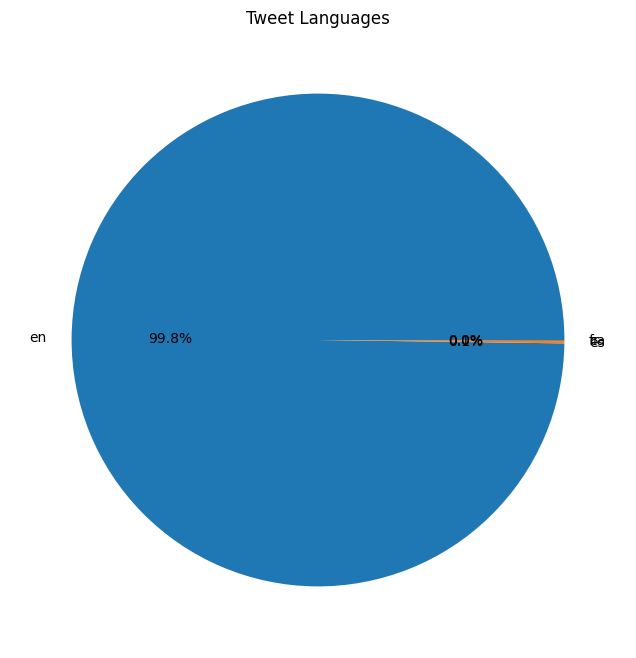

In [7]:
# Data Visualization : Pie chart of tweet languages
lang_counts = df['lang'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(lang_counts, labels=lang_counts.index, autopct='%1.1f%%')
plt.title('Tweet Languages')
plt.show()

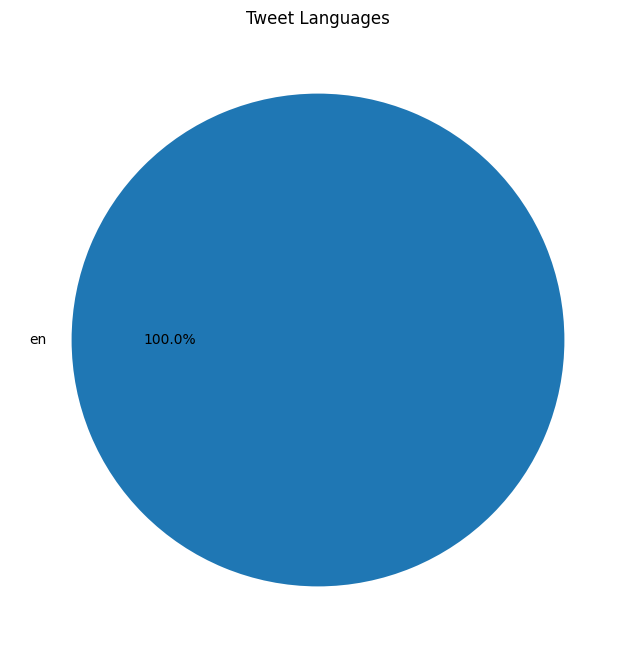

In [8]:
# Data Preprocessing: Keep only English language tweets
df = df[df['lang'] == 'en']
lang_counts = df['lang'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(lang_counts, labels=lang_counts.index, autopct='%1.1f%%')
plt.title('Tweet Languages')
plt.show()

In [9]:
# Removing unnecessary columns
columns_to_drop = ['User Profile Banner URL', 'User Description URLs', 'User URLs', 'User Pinned Tweet IDs']
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
# Data Preprocessing
# Convert 'created_at_datetime' to datetime format
df['created_at_datetime'] = pd.to_datetime(df['created_at_datetime'])

# Fill missing values in 'user_location' with 'Unknown'
df['user_location'] = df['user_location'].fillna('Unknown')

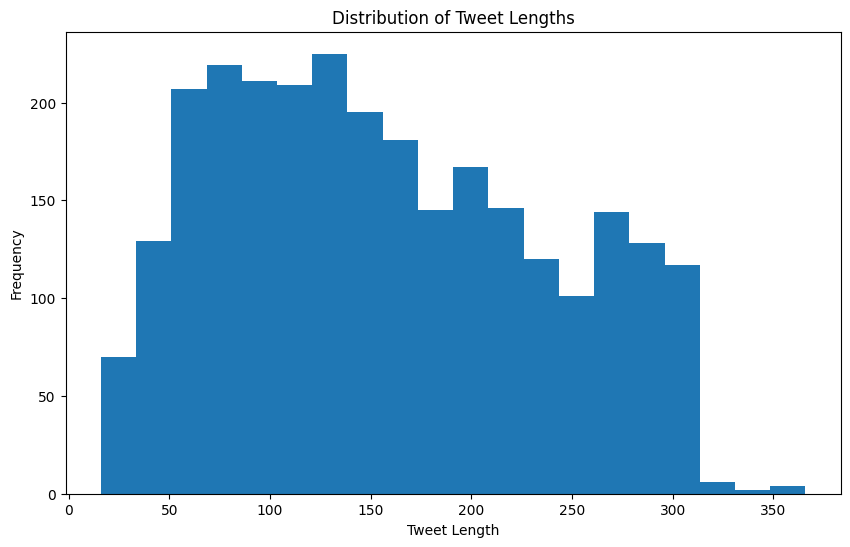

In [10]:
#  Histogram of tweet lengths
tweet_lengths = df['text'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(tweet_lengths, bins=20)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

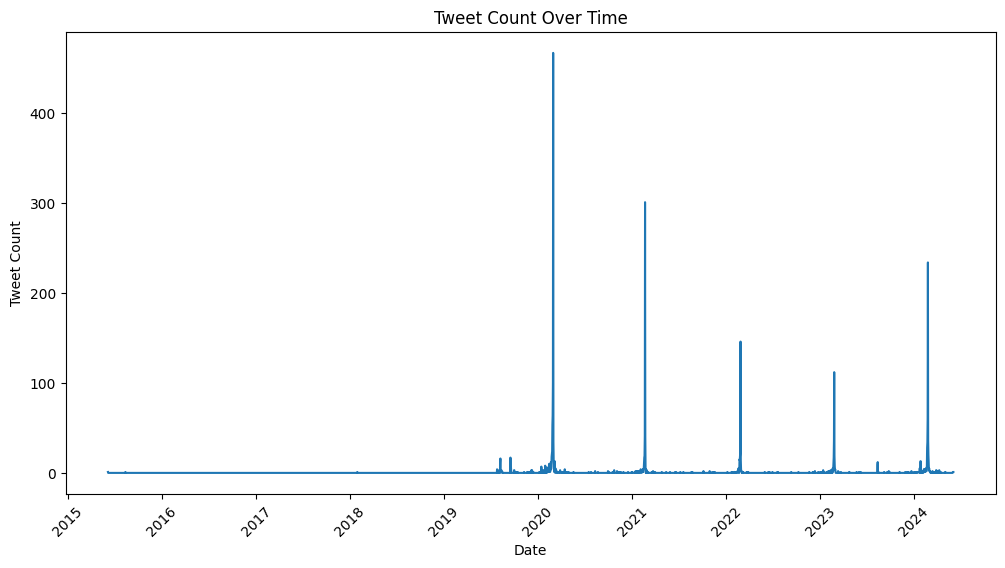

In [11]:
#  Line plot of tweet count over time
df['created_at_datetime'] = pd.to_datetime(df['created_at_datetime'])
tweet_counts = df.resample('D', on='created_at_datetime').size()
plt.figure(figsize=(12, 6))
plt.plot(tweet_counts.index, tweet_counts)
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Tweet Count Over Time')
plt.xticks(rotation=45)
plt.show()

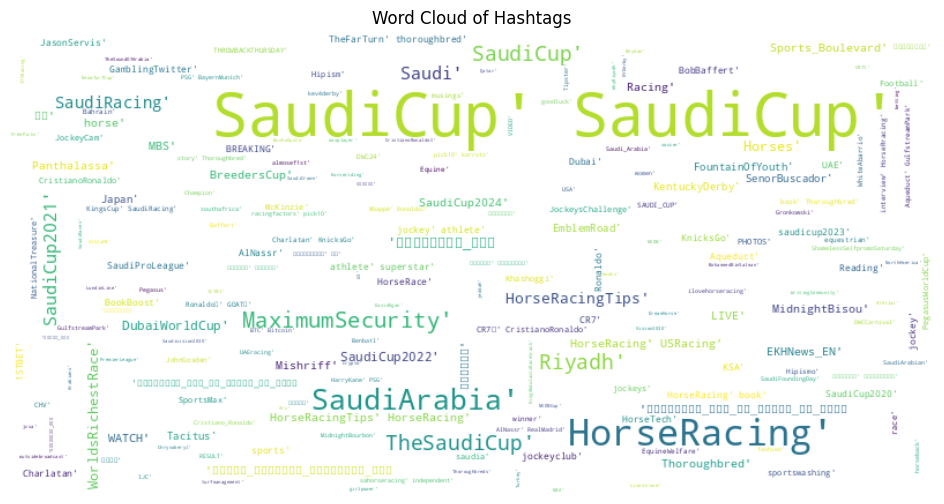

In [12]:
#  Word cloud of hashtags
from wordcloud import WordCloud

hashtags = df['hashtags'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags')
plt.show()

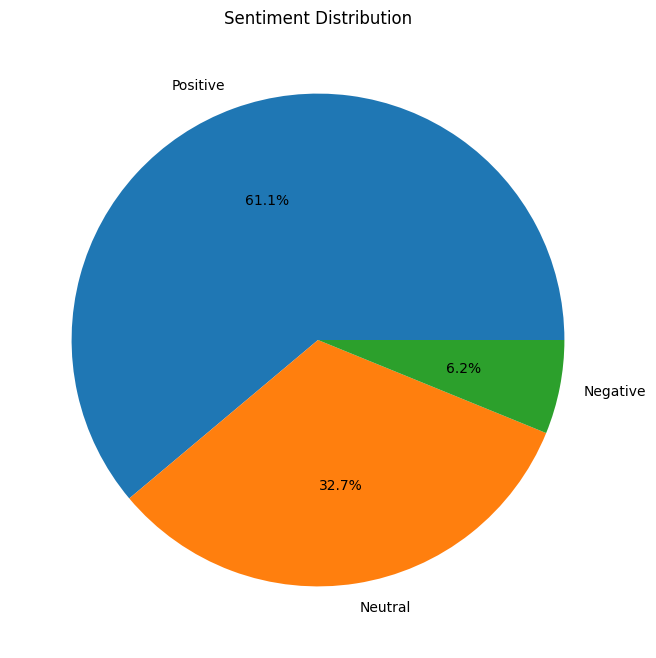

In [13]:
# Perform sentiment analysis using TextBlob
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Data Visualization : Pie chart of sentiment distribution
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

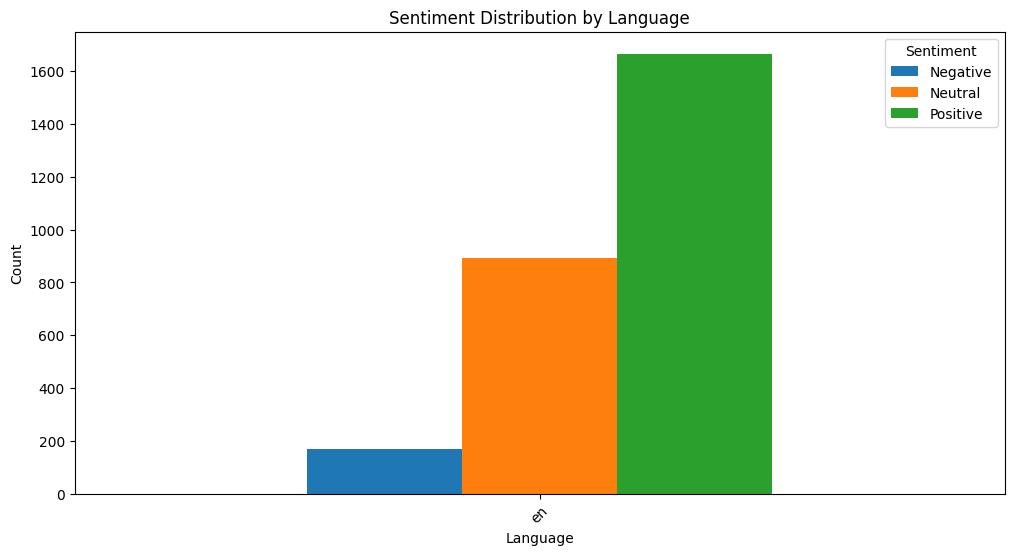

In [14]:
#  Bar plot of sentiment distribution by language
language_sentiment = df.groupby(['lang', 'sentiment_label']).size().unstack()
language_sentiment.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Language')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

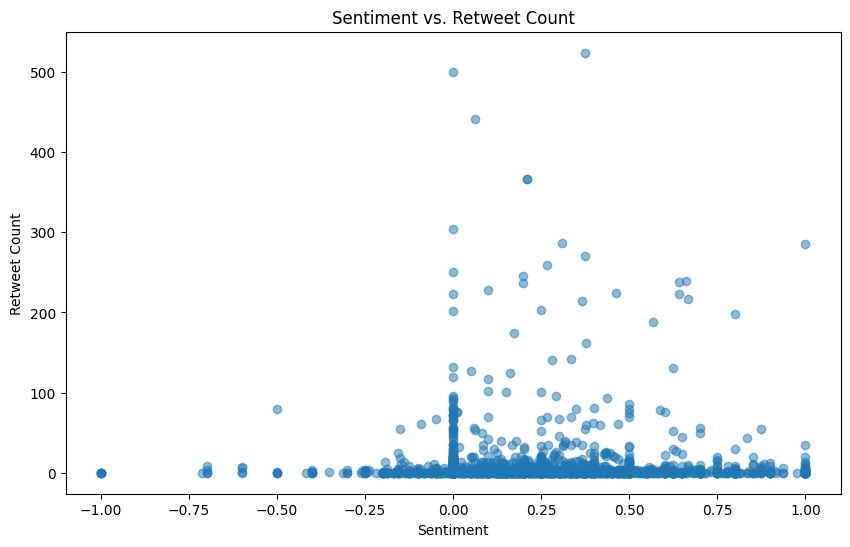

In [15]:
# Data Visualization : Scatter plot of sentiment vs. retweet count
plt.figure(figsize=(10, 6))
plt.scatter(df['sentiment'], df['retweet_count'], alpha=0.5)
plt.xlabel('Sentiment')
plt.ylabel('Retweet Count')
plt.title('Sentiment vs. Retweet Count')
plt.show()

In [18]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

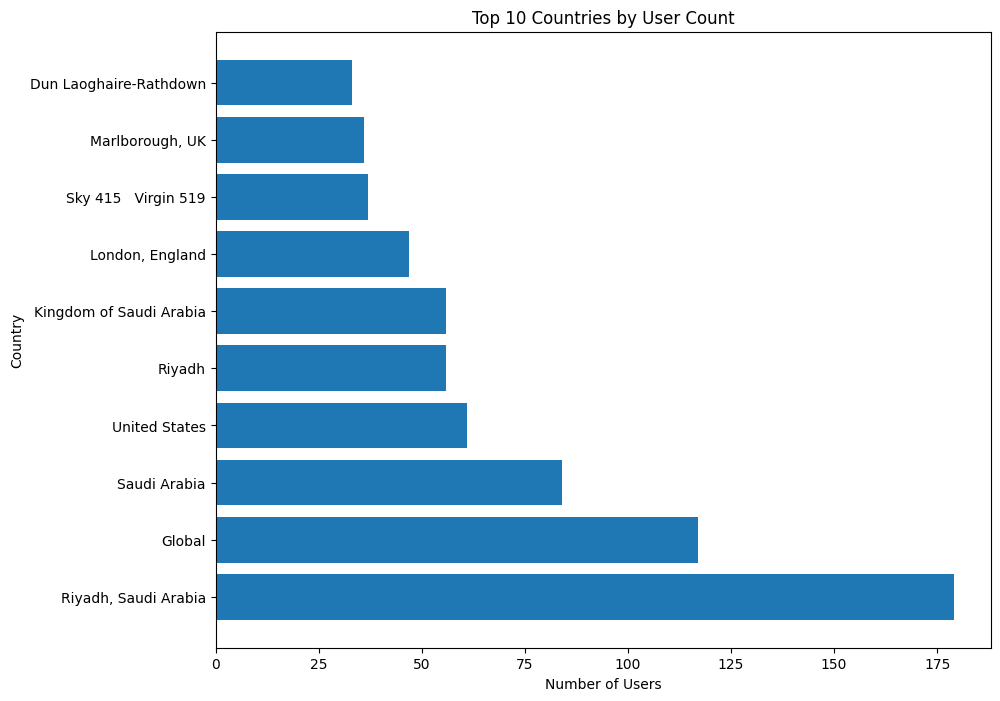

In [19]:
# Data Visualization : Horizontal bar plot of top 10 countries by user count
user_country_counts = df['user_location'].value_counts().nlargest(10)
plt.figure(figsize=(10, 8))
plt.barh(user_country_counts.index, user_country_counts)
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.title('Top 10 Countries by User Count')
plt.show()

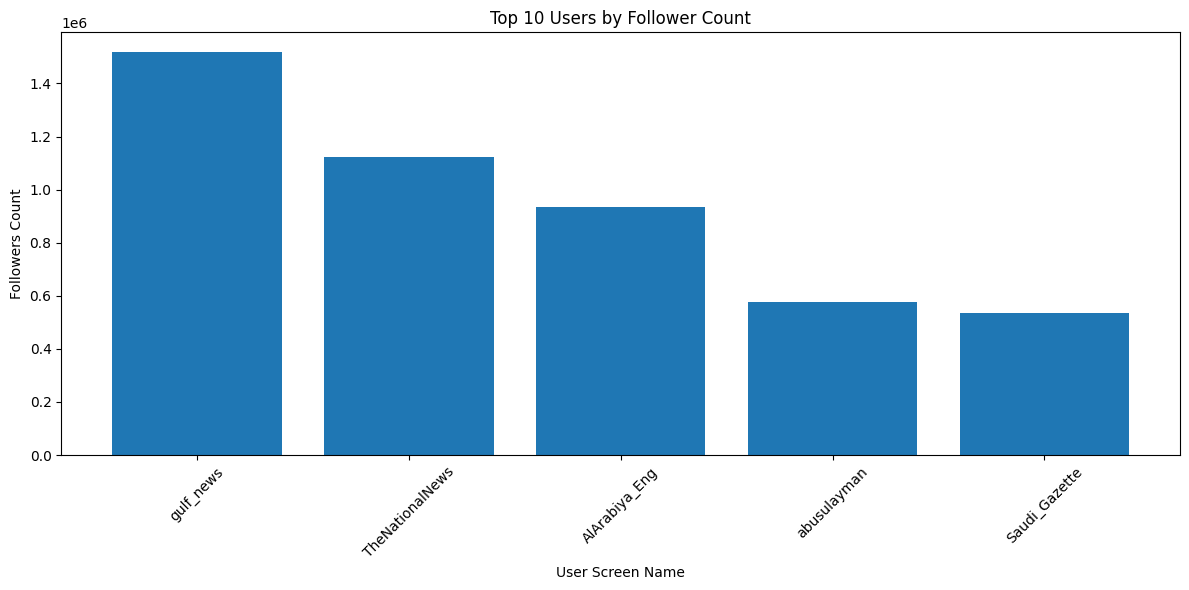

In [24]:
# Data Visualization : Bar plot of top 10 users by follower count
top_users = df.nlargest(10, 'user_followers_count')
plt.figure(figsize=(12, 6))
plt.bar(top_users['user_screen_name'], top_users['user_followers_count'])
plt.xlabel('User Screen Name')
plt.ylabel('Followers Count')
plt.title('Top 10 Users by Follower Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Remove unnecessary columns
columns_to_keep = ['text']
df = df[columns_to_keep]

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Define the sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

# Perform sentiment analysis using BERT
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    return sentiment_labels[predicted_class]

df['sentiment_label'] = df['text'].apply(predict_sentiment)

# Save the results to a new CSV file
df.to_csv('sentiment_results.csv', index=False)

print("Sentiment analysis completed. Results saved to 'sentiment_results.csv'.")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sentiment analysis completed. Results saved to 'sentiment_results.csv'.
